## Extração do Arquivo Tratado

In [156]:
import pandas as pd

In [157]:
df = pd.read_csv('https://raw.githubusercontent.com/RannyGazola/ChallengeTelecomX2/refs/heads/main/dados_tratados.csv')
df.head()

,customerID,Churn,customer gender,customer SeniorCitizen,customer Partner,customer Dependents,customer tenure,phone PhoneService,phone MultipleLines,internet InternetService,...,internet DeviceProtection,internet TechSupport,internet StreamingTV,internet StreamingMovies,account Contract,account PaperlessBilling,account PaymentMethod,account Charges Monthly,account Charges Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month to month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.9,267.40,2.796667


In [158]:
colunas = ['Churn','customer tenure','account Contract','customer SeniorCitizen','phone PhoneService','internet InternetService','account PaperlessBilling','account PaymentMethod','account Charges Monthly', 'account Charges Total']
dados = df[colunas].copy()

In [159]:
dados.shape

(7267, 10)

In [160]:
dados.describe()

,customer tenure,customer SeniorCitizen,account Charges Monthly,account Charges Total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,0.162653,64.720098,2277.182035
std,24.571773,0.369074,30.129572,2268.648587
min,0.000000,0.000000,18.250000,0.000000
25%,9.000000,0.000000,35.425000,396.200000
50%,29.000000,0.000000,70.300000,1389.200000
75%,55.000000,0.000000,89.875000,3778.525000
max,72.000000,1.000000,118.750000,8684.800000


In [161]:
dados.describe(include='O')

,Churn,account Contract,phone PhoneService,internet InternetService,account PaperlessBilling,account PaymentMethod
count,7043,7267,7267,7267,7267,7267
unique,2,3,2,3,2,4
top,No,Month to month,Yes,Fiber optic,Yes,Electronic check
freq,5174,4005,6560,3198,4311,2445


In [162]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     7043 non-null   object 
 1   customer tenure           7267 non-null   int64  
 2   account Contract          7267 non-null   object 
 3   customer SeniorCitizen    7267 non-null   int64  
 4   phone PhoneService        7267 non-null   object 
 5   internet InternetService  7267 non-null   object 
 6   account PaperlessBilling  7267 non-null   object 
 7   account PaymentMethod     7267 non-null   object 
 8   account Charges Monthly   7267 non-null   float64
 9   account Charges Total     7267 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 567.9+ KB


## Remoção de Linhas Vazias

In [163]:
dados = dados.dropna()

In [164]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     7043 non-null   object 
 1   customer tenure           7043 non-null   int64  
 2   account Contract          7043 non-null   object 
 3   customer SeniorCitizen    7043 non-null   int64  
 4   phone PhoneService        7043 non-null   object 
 5   internet InternetService  7043 non-null   object 
 6   account PaperlessBilling  7043 non-null   object 
 7   account PaymentMethod     7043 non-null   object 
 8   account Charges Monthly   7043 non-null   float64
 9   account Charges Total     7043 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 605.3+ KB


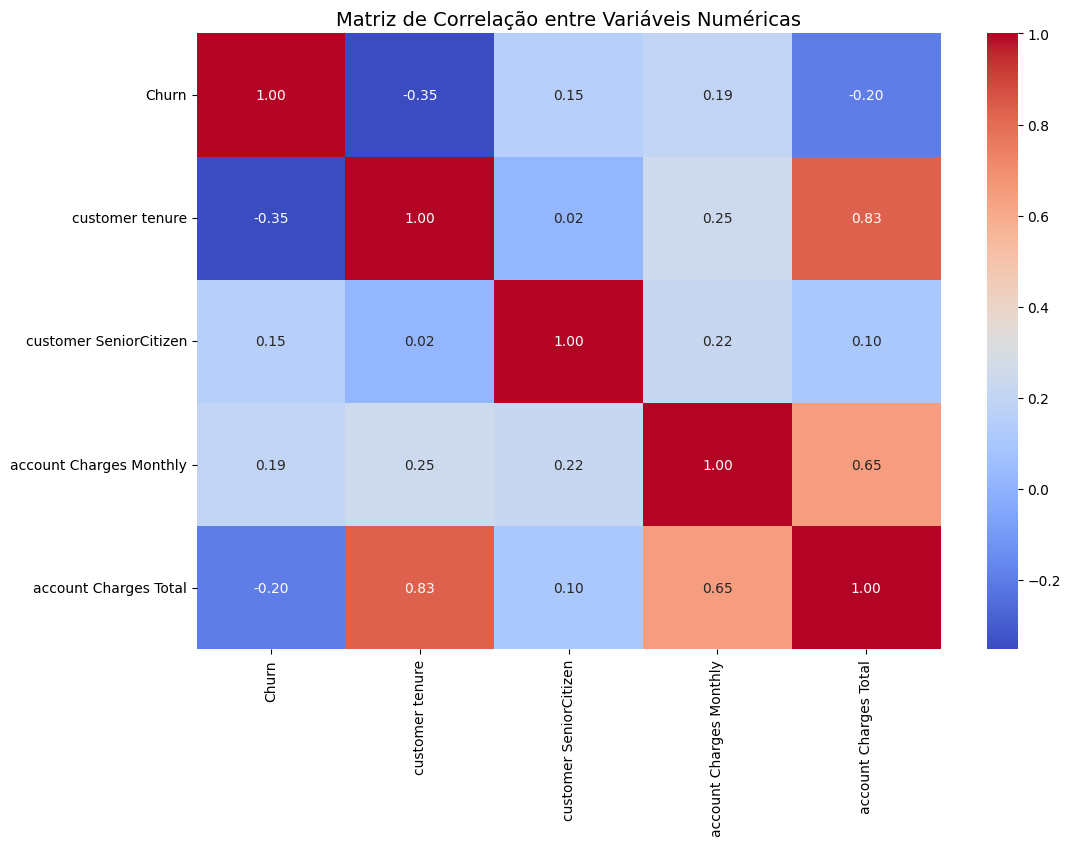

Correlação das variáveis com a evasão (Churn):
Churn                      1.000000
account Charges Monthly    0.193356
customer SeniorCitizen     0.150889
account Charges Total     -0.198324
customer tenure           -0.352229
Name: Churn, dtype: float64


In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

dados['Churn'] = dados['Churn'].apply(lambda x: 1 if x == "Yes" else 0)

numericas = dados.select_dtypes(include=['int64', 'float64'])

corr = numericas.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Matriz de Correlação entre Variáveis Numéricas", fontsize=14)
plt.show()

corr_com_churn = corr['Churn'].sort_values(ascending=False)
print("Correlação das variáveis com a evasão (Churn):")
print(corr_com_churn)

## Visualizações Gráficas

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [167]:
# dados = dados.replace({'No internet service': 'No', 'No': 'No', 'Yes': 'Yes'})

In [168]:
px.histogram(dados, x = 'Churn', text_auto = True)

In [169]:
px.histogram(dados, x = 'customer SeniorCitizen', text_auto = True, color = 'Churn', barmode = 'group')

In [170]:
px.histogram(dados, x = 'internet InternetService', text_auto = True, color = 'Churn', barmode = 'group')

In [171]:
px.histogram(dados, x = 'account Contract', text_auto = True, color = 'Churn', barmode = 'group')

In [172]:
px.histogram(dados, x = 'account PaperlessBilling', text_auto = True, color = 'Churn', barmode = 'group')

In [173]:
px.histogram(dados, x = 'account PaymentMethod', text_auto = True, color = 'Churn', barmode = 'group')

In [174]:
px.box(dados, x = 'customer tenure', color = 'Churn')

In [175]:
px.box(dados, x = 'account Charges Monthly', color = 'Churn')

In [176]:
px.box(dados, x = 'account Charges Total', color = 'Churn')

In [177]:
dados.rename(columns={"Churn":"Churn","customer tenure":"MesesContrato", "account Contract":"TipoContrato","customer SeniorCitizen":"Senioridade","account PaperlessBilling":"PagamentoPapel","account PaymentMethod":"MetodoPagamento",
                                   "account Charges Monthly":"TotalMensal","account Charges Total":"TotalGasto", "phone PhoneService":"Telefone", "internet InternetService":"Internet"}, inplace=True)

In [178]:
nome_colunas = dados.columns
dados.head()

,Churn,MesesContrato,TipoContrato,Senioridade,Telefone,Internet,PagamentoPapel,MetodoPagamento,TotalMensal,TotalGasto
0,0,9,One year,0,Yes,DSL,Yes,Mailed check,65.6,593.30
1,0,9,Month to month,0,Yes,DSL,No,Mailed check,59.9,542.40
2,1,4,Month to month,0,Yes,Fiber optic,Yes,Electronic check,73.9,280.85
3,1,13,Month to month,1,Yes,Fiber optic,Yes,Electronic check,98.0,1237.85
4,1,3,Month to month,1,Yes,Fiber optic,Yes,Mailed check,83.9,267.40


## Encoding

In [179]:
x = dados.drop('Churn', axis = 1)
y = dados['Churn']

In [180]:
x

,MesesContrato,TipoContrato,Senioridade,Telefone,Internet,PagamentoPapel,MetodoPagamento,TotalMensal,TotalGasto
0,9,One year,0,Yes,DSL,Yes,Mailed check,65.60,593.30
1,9,Month to month,0,Yes,DSL,No,Mailed check,59.90,542.40
2,4,Month to month,0,Yes,Fiber optic,Yes,Electronic check,73.90,280.85
3,13,Month to month,1,Yes,Fiber optic,Yes,Electronic check,98.00,1237.85
4,3,Month to month,1,Yes,Fiber optic,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...
7262,13,One year,0,Yes,DSL,No,Mailed check,55.15,742.90
7263,22,Month to month,0,Yes,Fiber optic,Yes,Electronic check,85.10,1873.70
7264,2,Month to month,0,Yes,DSL,Yes,Mailed check,50.30,92.75
7265,67,Two year,0,Yes,DSL,No,Mailed check,67.85,4627.65


In [181]:
y

0       0
1       0
2       1
3       1
4       1
       ..
7262    0
7263    1
7264    0
7265    0
7266    0
Name: Churn, Length: 7043, dtype: int64

## Transformando as Variávies Explicativas

In [182]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [183]:
colunas = x.columns
colunas

Index(['MesesContrato', 'TipoContrato', 'Senioridade', 'Telefone', 'Internet',
       'PagamentoPapel', 'MetodoPagamento', 'TotalMensal', 'TotalGasto'],
      dtype='object')

In [184]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['TipoContrato', 'Senioridade', 'Telefone', 'Internet',
       'PagamentoPapel', 'MetodoPagamento']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [185]:
x = one_hot.fit_transform(x)

In [186]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__TipoContrato_Month to month',
       'onehotencoder__TipoContrato_One year',
       'onehotencoder__TipoContrato_Two year',
       'onehotencoder__Senioridade_1', 'onehotencoder__Telefone_Yes',
       'onehotencoder__Internet_DSL',
       'onehotencoder__Internet_Fiber optic',
       'onehotencoder__Internet_No', 'onehotencoder__PagamentoPapel_Yes',
       'onehotencoder__MetodoPagamento_Bank transfer ',
       'onehotencoder__MetodoPagamento_Credit card ',
       'onehotencoder__MetodoPagamento_Electronic check',
       'onehotencoder__MetodoPagamento_Mailed check',
       'remainder__MesesContrato', 'remainder__TotalMensal',
       'remainder__TotalGasto'], dtype=object)

In [187]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__TipoContrato_Month to month,onehotencoder__TipoContrato_One year,onehotencoder__TipoContrato_Two year,onehotencoder__Senioridade_1,onehotencoder__Telefone_Yes,onehotencoder__Internet_DSL,onehotencoder__Internet_Fiber optic,onehotencoder__Internet_No,onehotencoder__PagamentoPapel_Yes,onehotencoder__MetodoPagamento_Bank transfer,onehotencoder__MetodoPagamento_Credit card,onehotencoder__MetodoPagamento_Electronic check,onehotencoder__MetodoPagamento_Mailed check,remainder__MesesContrato,remainder__TotalMensal,remainder__TotalGasto
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,65.60,593.30
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,59.90,542.40
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,73.90,280.85
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,13.0,98.00,1237.85
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,55.15,742.90
7039,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,22.0,85.10,1873.70
7040,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,50.30,92.75
7041,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67.0,67.85,4627.65


## Transformando a variável alvo

In [188]:
from sklearn.preprocessing import LabelEncoder

In [189]:
label_ecoder = LabelEncoder()

In [190]:
y = label_ecoder.fit_transform(y)

In [191]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(7043,))

## Modelos

## Árvore

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import NearMiss

In [193]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [194]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.50, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [195]:
arvore = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arvore', arvore)])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall')

## Avaliando o modelo Árvore

In [196]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.5412077020843284, 0.6685559687799116]


              precision    recall  f1-score   support

           0       0.85      0.75      0.80      2587
           1       0.48      0.62      0.54       935

    accuracy                           0.72      3522
   macro avg       0.66      0.69      0.67      3522
weighted avg       0.75      0.72      0.73      3522



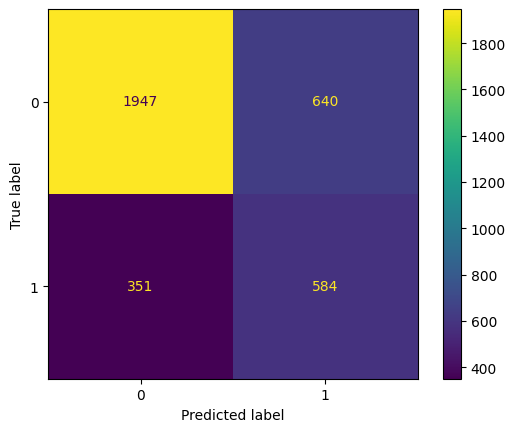

In [197]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

arvore = DecisionTreeClassifier(max_depth = 10)
arvore.fit(x_balanceado, y_balanceado)
y_previsto = arvore.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);

# KNN

In [198]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [199]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.180556,0.550225,0.110152
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.486111,0.704648,0.374367
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.013889,0.609695,0.009177
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.430556,0.624188,0.293127
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.875000,0.624188,0.601568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.402778,0.613693,0.254675
2636,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.236111,0.838081,0.200638
2637,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.750000,0.016992,0.125576
2638,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.875000,0.846577,0.760294


              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2587
           1       0.50      0.55      0.52       935

    accuracy                           0.73      3522
   macro avg       0.66      0.67      0.67      3522
weighted avg       0.74      0.73      0.74      3522



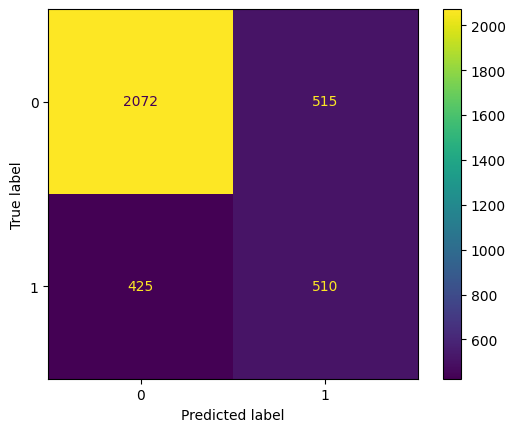

In [200]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);